In [1]:
import os
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
import pathlib
import seaborn as sns
import numpy as np
from anndata import AnnData
import squidpy as sq

%load_ext lab_black
%load_ext autoreload
%autoreload 2

In [2]:
BASE_PATH = pathlib.Path(
    "/storage/groups/ml01/datasets/raw/20201214_SquidpyData_giovanni.palla/slideseqV2/SCP815/other"
)
DATA_PATH = ""

In [3]:
dge = np.sort(
    [fname for fname in os.listdir(BASE_PATH) if "digital_expression" in fname]
)
coords = np.sort(
    [fname for fname in os.listdir(BASE_PATH) if "bead_locations" in fname]
)

In [4]:
coords

array(['Puck_190921_19_bead_locations.csv',
       'Puck_190921_21_bead_locations.csv',
       'Puck_190926_01_bead_locations.csv',
       'Puck_190926_02_bead_locations.csv',
       'Puck_190926_03_bead_locations.csv',
       'Puck_190926_06_bead_locations.csv',
       'Puck_191007_07_bead_locations.csv',
       'Puck_191204_01_bead_locations.csv',
       'Puck_200115_08_bead_locations.csv'], dtype='<U33')

In [5]:
dge

array(['Puck_190921_19.digital_expression.txt.gz',
       'Puck_190921_21.digital_expression.txt.gz',
       'Puck_190926_01.digital_expression.txt.gz',
       'Puck_190926_02.digital_expression.txt.gz',
       'Puck_190926_03.digital_expression.txt.gz',
       'Puck_190926_06.digital_expression.txt.gz',
       'Puck_191007_07.digital_expression.txt.gz',
       'Puck_191204_01.digital_expression.txt.gz',
       'Puck_200115_08.digital_expression.txt'], dtype='<U40')

In [6]:
counts = pd.read_csv(
    BASE_PATH / "Puck_200115_08.digital_expression.txt", index_col=0, delimiter="\t"
)

In [7]:
genes = counts.index.values

In [8]:
counts_t = counts.T.copy()

In [9]:
counts_t

GENE            0610005C13Rik  0610007P14Rik  0610009B22Rik  0610009E02Rik  \
AACGTCATAATCGT              0              1              1              0   
TACTTTAGCGCAGT              0              0              0              0   
CATGCCTGGGTTCG              0              0              2              0   
TCGATATGGCACAA              0              2              0              0   
TTATCTGACGAAGC              0              1              0              0   
...                       ...            ...            ...            ...   
ACAATACAGATACT              0              0              0              0   
GGTCAGGTTAACGT              0              0              0              0   
CATTATGGAATTCT              0              0              0              0   
GACTTTTCTTAAAG              0              0              0              0   
GTCAATAAAGGGCG              0              0              0              0   

GENE            0610009L18Rik  0610009O20Rik  0610010F05Rik  0610010K14Rik  \
AACGTCATAATCGT              0              1              2              0   
TACTTTAGCGCAGT              0              0              0              0   
CATGCCTGGGTTCG              0              0              3              0   
TCGATATGGCACAA              0              0              1              0   
TTATCTGACGAAGC              0              0              1              0   
...                       ...            ...            ...            ...   
ACAATACAGATACT              0              0              0              0   
GGTCAGGTTAACGT              0              0              0              0   
CATTATGGAATTCT              0              0              0              0   
GACTTTTCTTAAAG              0              0              0              0   
GTCAATAAAGGGCG              0              0              0              0   

GENE            0610011F06Rik  0610012D04Rik  ...  mt-Tq  mt-Tr  mt-Ts2  \
AACGTCATAATCGT              5              0  ...      0      0       0   
TACTTTAGCGCAGT              2              0  ...      2      0       1   
CATGCCTGGGTTCG              2              0  ...      1      0       0   
TCGATATGGCACAA              3              0  ...      0      0       0   
TTATCTGACGAAGC              0              0  ...      1      0       0   
...                       ...            ...  ...    ...    ...     ...   
ACAATACAGATACT              0              0  ...      0      0       0   
GGTCAGGTTAACGT              0              0  ...      0      0       0   
CATTATGGAATTCT              0              0  ...      0      0       0   
GACTTTTCTTAAAG              0              0  ...      0      0       0   
GTCAATAAAGGGCG              0              0  ...      0      0       0   

GENE            mt-Tt  mt-Tv  n-R5-8s1  n-R5s173  n-R5s33  n-R5s40  n-R5s95  
AACGTCATAATCGT      0      2         0         0        0        0        0  
TACTTTAGCGCAGT      0      1         0         0        0        0        0  
CATGCCTGGGTTCG      0      2         0         0        0        0        0  
TCGATATGGCACAA      0      1         0         0        0        0        0  
TTATCTGACGAAGC      0      2         0         0        0        0        0  
...               ...    ...       ...       ...      ...      ...      ...  
ACAATACAGATACT      0      0         0         0        0        0        0  
GGTCAGGTTAACGT      0      0         0         0        0        0        0  
CATTATGGAATTCT      0      0         0         0        0        0        0  
GACTTTTCTTAAAG      0      0         0         0        0        0        0  
GTCAATAAAGGGCG      0      0         0         0        0        0        0  

[53208 rows x 23264 columns]

In [10]:
coords = pd.read_csv(
    BASE_PATH / "Puck_200115_08_bead_locations.csv",
    delimiter=",",
    skiprows=1,
    header=None,
)
coords.columns = ["barcode", "x", "y"]

In [11]:
coords

barcode        x       y
0      AACGTCATAATCGT   888.95  3219.5
1      TACTTTAGCGCAGT  4762.20  5020.4
2      CATGCCTGGGTTCG   886.50  3199.6
3      TCGATATGGCACAA  2237.10  5144.6
4      TTATCTGACGAAGC  1031.80  2425.2
...               ...      ...     ...
53203  ACAATACAGATACT  3025.50  5516.0
53204  GGTCAGGTTAACGT  3069.70  3211.9
53205  CATTATGGAATTCT  3507.10  2811.0
53206  GACTTTTCTTAAAG  2155.00  1264.3
53207  GTCAATAAAGGGCG  4819.70  2476.7

[53208 rows x 3 columns]

In [12]:
import scipy

counts_sparse = scipy.sparse.csr_matrix(counts_t.to_numpy())
counts_sparse.eliminate_zeros()
adata = AnnData(counts_sparse, obs=coords)
adata.obs_names = coords.barcode.values
adata.var_names = genes

/home/icb/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [13]:
adata.var_names_make_unique()
adata.var["MT"] = adata.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["MT"], inplace=True)

/home/icb/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/icb/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/icb/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code

<AxesSubplot:xlabel='n_genes_by_counts'>

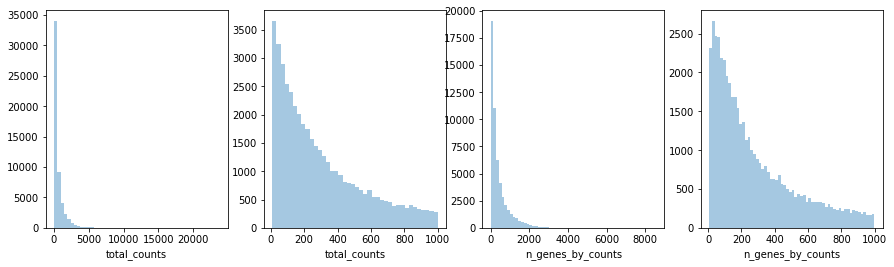

In [14]:
import seaborn as sns

fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(
    adata.obs["total_counts"][adata.obs["total_counts"] < 1000],
    kde=False,
    bins=40,
    ax=axs[1],
)
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.distplot(
    adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 1000],
    kde=False,
    bins=60,
    ax=axs[3],
)

In [15]:
sc.pp.filter_cells(adata, min_counts=100)
sc.pp.filter_genes(adata, min_cells=10)

In [16]:
coords

barcode        x       y
0      AACGTCATAATCGT   888.95  3219.5
1      TACTTTAGCGCAGT  4762.20  5020.4
2      CATGCCTGGGTTCG   886.50  3199.6
3      TCGATATGGCACAA  2237.10  5144.6
4      TTATCTGACGAAGC  1031.80  2425.2
...               ...      ...     ...
53203  ACAATACAGATACT  3025.50  5516.0
53204  GGTCAGGTTAACGT  3069.70  3211.9
53205  CATTATGGAATTCT  3507.10  2811.0
53206  GACTTTTCTTAAAG  2155.00  1264.3
53207  GTCAATAAAGGGCG  4819.70  2476.7

[53208 rows x 3 columns]

In [17]:
adata.obsm["spatial"] = coords[coords.barcode.isin(adata.obs_names.values)][
    ["x", "y"]
].to_numpy()

In [18]:
cond = ((adata.obsm["spatial"][:, 0] > 750) & (adata.obsm["spatial"][:, 0] < 5750)) & (
    (adata.obsm["spatial"][:, 1] > 670) & (adata.obsm["spatial"][:, 1] < 5700)
)

In [19]:
adata = adata[cond].copy()

In [68]:
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=4000)
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
adata.raw = adata
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.7)

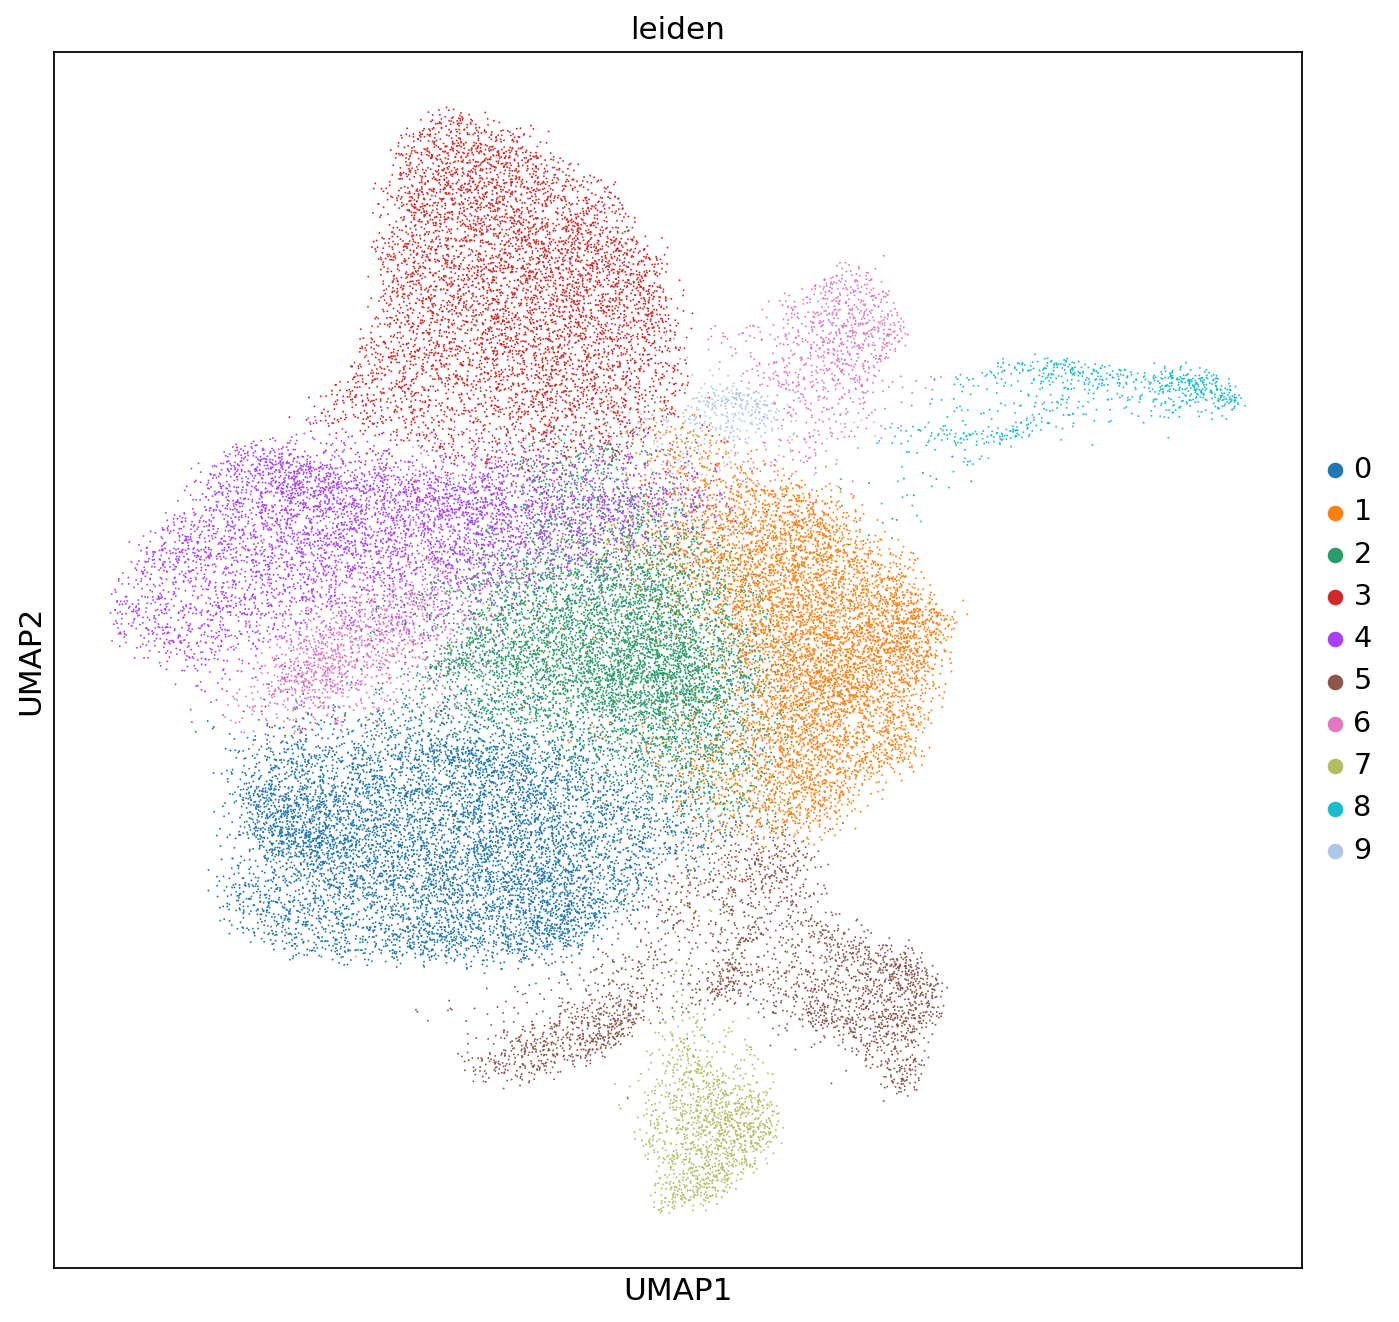

In [69]:
sc.pl.umap(adata, color="leiden")

In [70]:
anno = pd.read_csv(
    "/storage/groups/ml01/datasets/raw/20201214_SquidpyData_giovanni.palla/slideseqV2/barcode_clusters.csv"
)
deconv = pd.read_csv(
    "/storage/groups/ml01/datasets/raw/20201214_SquidpyData_giovanni.palla/slideseqV2/bead_deconv_df_norm.csv"
)

In [71]:
deconv

Interneurons  Subiculum_Entorhinal_cl2  Subiculum_Entorhinal_cl3  \
0          0.113249                  0.203010                  0.086060   
1          0.055718                  0.077973                  0.048517   
2          0.108751                  0.228845                  0.109581   
3          0.108163                  0.029694                  0.112905   
4          0.065790                  0.236463                  0.012458   
...             ...                       ...                       ...   
53182      0.026806                  0.000000                  0.000000   
53183      0.000000                  0.188921                  0.000000   
53184      0.000000                  0.000000                  0.000000   
53185      0.000000                  0.000000                  0.000000   
53186      0.000000                  0.000000                  0.000000   

       DentatePyramids  CA1_CA2_CA3_Subiculum     Mural  Astrocytes  \
0             0.247319               0.153769  0.002455    0.072134   
1             0.187755               0.195889  0.040198    0.126317   
2             0.246070               0.115723  0.006306    0.071186   
3             0.172960               0.122573  0.014295    0.065901   
4             0.233441               0.145091  0.014810    0.097935   
...                ...                    ...       ...         ...   
53182         0.154486               0.692437  0.000000    0.126271   
53183         0.520199               0.019765  0.000000    0.000000   
53184         0.000000               0.000000  0.000000    0.749241   
53185         0.067453               0.881551  0.002817    0.012518   
53186         0.000000               0.000000  0.000000    0.615746   

       Oligodendrocytes  Polydendrocytes  Microglia  Ependymal  \
0              0.022327         0.008712   0.065562   0.003853   
1              0.071605         0.052353   0.013668   0.016075   
2              0.015768         0.000000   0.059735   0.000000   
3              0.031834         0.096153   0.034155   0.094124   
4              0.052590         0.023642   0.008578   0.014275   
...                 ...              ...        ...        ...   
53182          0.000000         0.000000   0.000000   0.000000   
53183          0.000000         0.000000   0.000000   0.000000   
53184          0.000000         0.000000   0.250759   0.000000   
53185          0.000000         0.000000   0.012576   0.003112   
53186          0.149733         0.212449   0.000000   0.022072   

       Endothelial_Tip  Neurogenesis  Endothelial_Stalk         barcode  \
0             0.000000      0.000000           0.021550  AACGTCATAATCGT   
1             0.044060      0.012159           0.057714  TACTTTAGCGCAGT   
2             0.013702      0.000000           0.024332  CATGCCTGGGTTCG   
3             0.065322      0.011114           0.040808  TCGATATGGCACAA   
4             0.058715      0.000000           0.036213  TTATCTGACGAAGC   
...                ...           ...                ...             ...   
53182         0.000000      0.000000           0.000000  AAAATATTAAGCCC   
53183         0.000000      0.271115           0.000000  ACAATACAGATACT   
53184         0.000000      0.000000           0.000000  CATTATGGAATTCT   
53185         0.019974      0.000000           0.000000  GACTTTTCTTAAAG   
53186         0.000000      0.000000           0.000000  GTCAATAAAGGGCG   

       max_cell_type    maxval  thresh_ct  
0                  4  0.247319   0.000000  
1                  5  0.195889   0.000000  
2                  4  0.246070   0.000000  
3                  4  0.172960   0.000000  
4                  2  0.236463   0.000000  
...              ...       ...        ...  
53182              5  0.692437   0.692437  
53183              4  0.520199   0.520199  
53184              7  0.749241   0.749241  
53185              5  0.881551   0.881551  
53186              7  0.615746   0.615746  

[53187 rows x 18 columns]

In [72]:
anno

barcode  max_factor  atlas_cluster            named_clusters
0      AACGTCATAATCGT           4              4           DentatePyramids
1      TACTTTAGCGCAGT          19              5     CA1_CA2_CA3_Subiculum
2      CATGCCTGGGTTCG           4              4           DentatePyramids
3      TCGATATGGCACAA           4              4           DentatePyramids
4      TTATCTGACGAAGC          21              2  Subiculum_Entorhinal_cl2
...               ...         ...            ...                       ...
53182  AAAATATTAAGCCC          28              5     CA1_CA2_CA3_Subiculum
53183  ACAATACAGATACT           4              4           DentatePyramids
53184  CATTATGGAATTCT           8              7                Astrocytes
53185  GACTTTTCTTAAAG           2              5     CA1_CA2_CA3_Subiculum
53186  GTCAATAAAGGGCG          11              7                Astrocytes

[53187 rows x 4 columns]

In [73]:
anno_c = anno[anno.barcode.isin(adata.obs_names.values)].copy()
np.testing.assert_array_equal(anno_c.barcode.values, adata.obs_names.values)

In [74]:
adata.obs["cluster"] = anno_c.named_clusters.values

In [75]:
deconv_c = deconv[deconv.barcode.isin(adata.obs_names.values)].copy()
np.testing.assert_array_equal(deconv_c.barcode.values, adata.obs_names.values)

In [76]:
for c in deconv_c.columns[0:14]:
    print(c)
    adata.obs[c] = deconv_c[c].values

Interneurons
Subiculum_Entorhinal_cl2
Subiculum_Entorhinal_cl3
DentatePyramids
CA1_CA2_CA3_Subiculum
Mural
Astrocytes
Oligodendrocytes
Polydendrocytes
Microglia
Ependymal
Endothelial_Tip
Neurogenesis
Endothelial_Stalk


In [77]:
adata

AnnData object with n_obs × n_vars = 41786 × 17733
    obs: 'barcode', 'x', 'y', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster', 'Interneurons', 'Subiculum_Entorhinal_cl2', 'Subiculum_Entorhinal_cl3', 'DentatePyramids', 'CA1_CA2_CA3_Subiculum', 'Mural', 'Astrocytes', 'Oligodendrocytes', 'Polydendrocytes', 'Microglia', 'Ependymal', 'Endothelial_Tip', 'Neurogenesis', 'Endothelial_Stalk'
    var: 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'spatial', 'X_pca', 'X_umap'
    varm: '

... storing 'cluster' as categorical


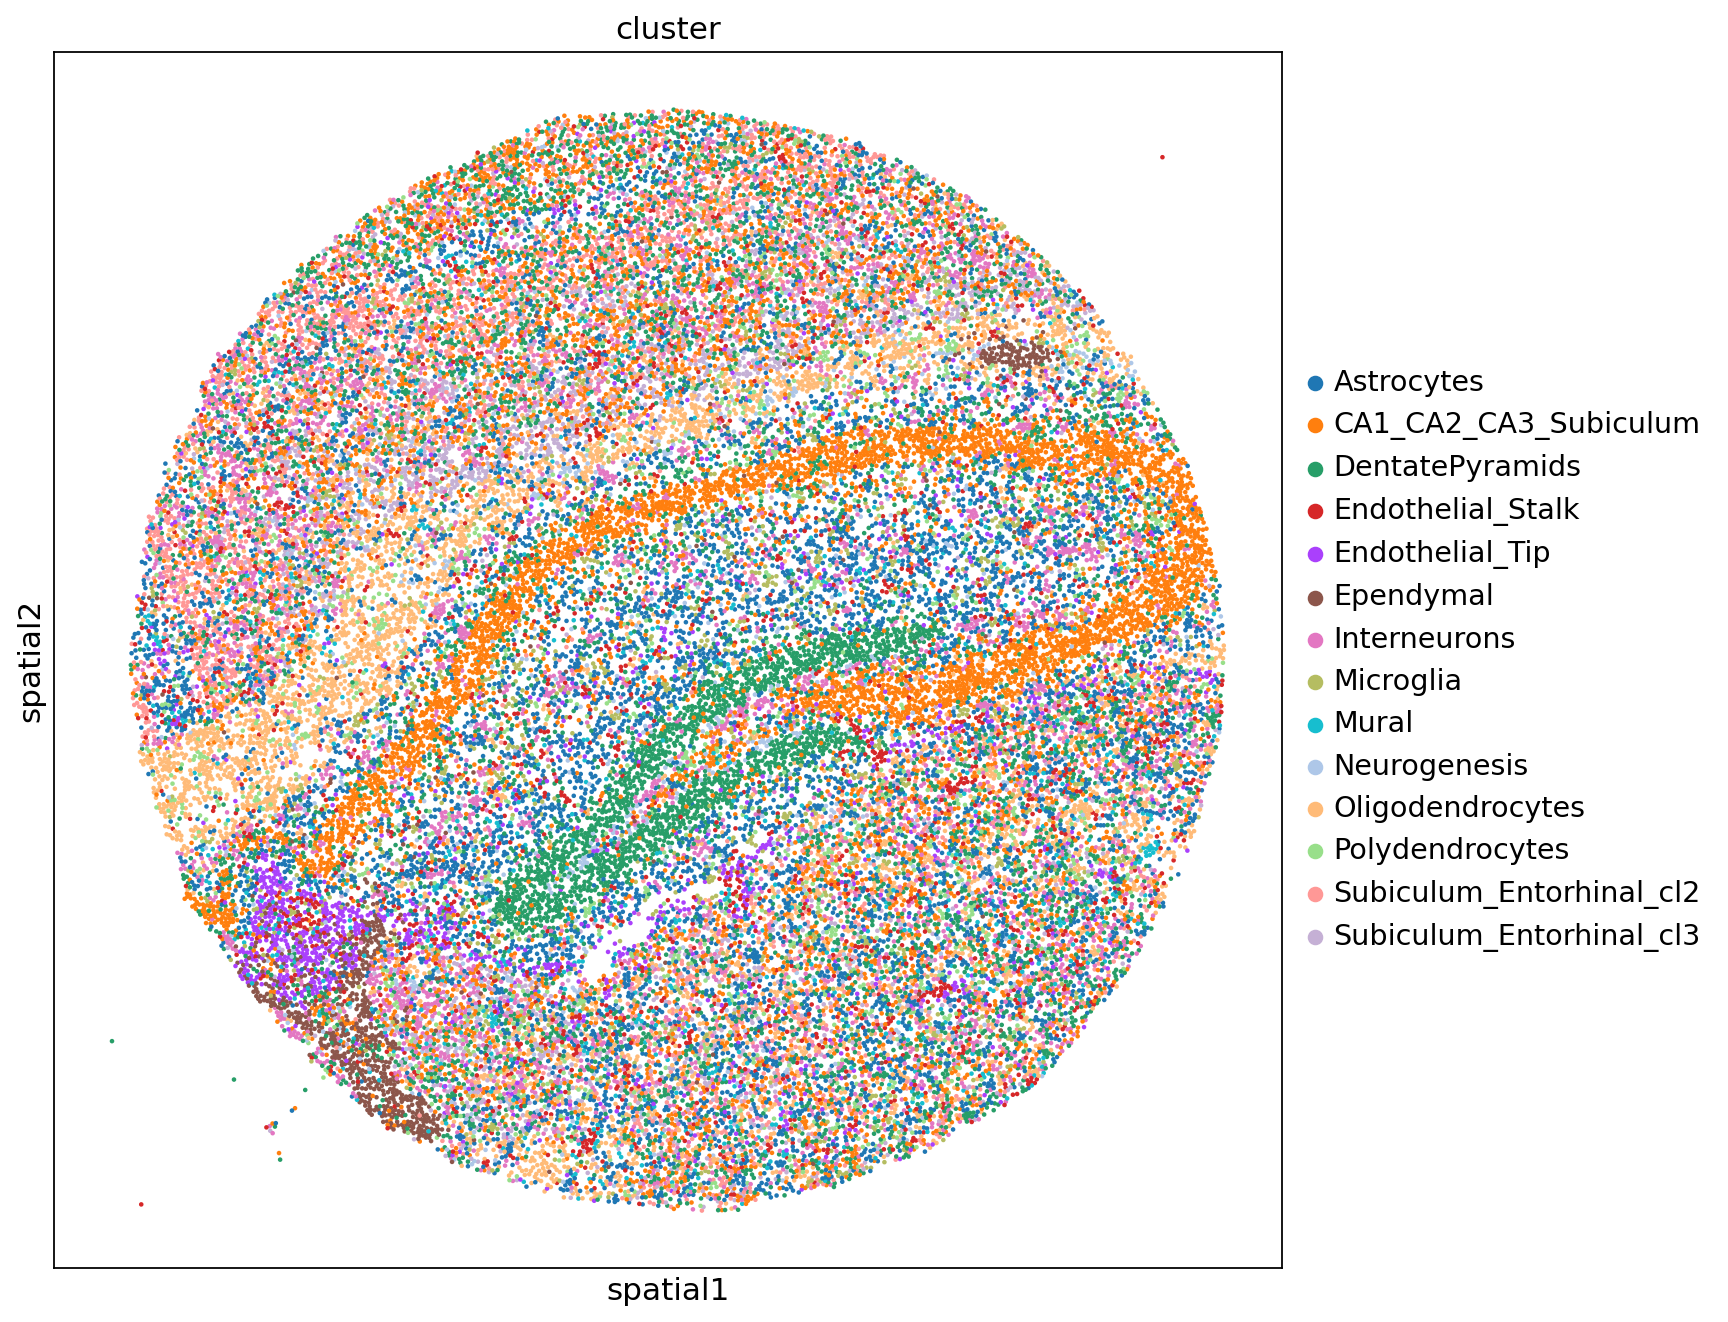

In [79]:
sc.set_figure_params(figsize=(10, 10))
fig, ax = plt.subplots(1, 1)
sc.pl.spatial(
    adata,
    color="cluster",
    spot_size=20,
    ax=ax,  # crop_coord=(750, 5750, 670, 5700)
)

In [83]:
sq.gr.spatial_neighbors(adata, coord_type="grid", delaunay=True)

In [84]:
adata.write(
    "/storage/groups/ml01/datasets/raw/20201214_SquidpyData_giovanni.palla/tutorial_data/slideseqv2.h5ad"
)